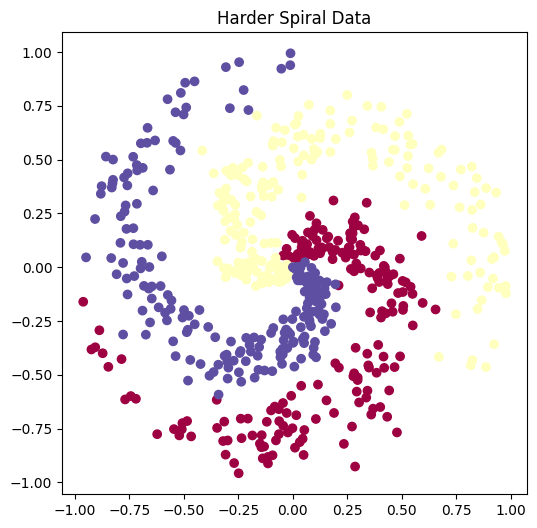

In [87]:
import numpy as np
import matplotlib.pyplot as plt
def generate_harder_spiral_data(points_per_class=200, noise=0.4,
num_classes=3):
    N = points_per_class # points per class
    D = 2 # input dimension
    K = num_classes # number of classes
    X = np.zeros((N*K,D))
    y = np.zeros(N*K, dtype='uint8')
    for j in range(K):
        ix = range(N*j, N*(j+1))
        r = np.linspace(0.0, 1, N)
        t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*noise
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        y[ix] = j
    return X, y
# Generate data
X, y = generate_harder_spiral_data()
# Plot
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1],c=y, cmap="Spectral")
plt.title('Harder Spiral Data')
plt.show()


In [82]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [89]:
y_train

array([0, 0, 1, 2, 0, 0, 2, 1, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 1, 1, 2, 1, 0, 2, 0, 0, 1, 1, 0, 2,
       1, 0, 1, 1, 2, 1, 1, 1, 2, 2, 0, 0, 2, 0, 0, 1, 0, 1, 2, 2, 2, 1,
       1, 2, 1, 1, 2, 2, 0, 1, 2, 1, 2, 1, 2, 0, 0, 2, 2, 0, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 0, 1, 0, 1, 0, 2, 0, 0, 2, 0, 1, 1, 2, 1, 1, 0, 1,
       0, 2, 1, 2, 2, 0, 2, 1, 2, 1, 2, 1, 2, 0, 0, 1, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 1, 1, 0, 1, 1, 1, 2, 0, 1, 2, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 2, 2, 0, 0, 2, 2, 0, 2, 2, 1, 2, 1, 1, 0, 2, 1, 0, 1, 0, 0, 1,
       2, 0, 2, 1, 0, 2, 2, 2, 0, 1, 0, 1, 0, 0, 0, 2, 1, 2, 1, 0, 1, 0,
       2, 2, 0, 1, 2, 2, 1, 1, 1, 1, 2, 0, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1,
       1, 2, 1, 0, 1, 2, 2, 0, 2, 1, 0, 1, 0, 2, 2, 0, 2, 1, 1, 2, 0, 2,
       0, 0, 1, 2, 0, 1, 1, 1, 2, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 1, 0, 2,
       1, 1, 0, 1, 0, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 0, 0, 2, 2,
       2, 1, 1, 0, 2, 1, 1, 2, 0, 1, 0, 2, 0, 2, 1,

In [91]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(32, activation='relu', input_shape=(2,)),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 
])

c:\Users\Sohai\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [92]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # 
    metrics=['accuracy']
)
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,403 (9.39 KB)

 Trainable params: 2,403 (9.39 KB)

 Non-trainable params: 0 (0.00 B)

In [93]:
history = model.fit(
    X_train, y_train,
    epochs=150,
   
    validation_data=(X_test, y_test)  # Monitor test performance
)

Epoch 1/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4048 - loss: 1.0934 - val_accuracy: 0.4500 - val_loss: 1.0468
Epoch 2/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5467 - loss: 1.0197 - val_accuracy: 0.5083 - val_loss: 0.9895
Epoch 3/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5171 - loss: 0.9627 - val_accuracy: 0.4833 - val_loss: 0.9399
Epoch 4/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5436 - loss: 0.9079 - val_accuracy: 0.4750 - val_loss: 0.9040
Epoch 5/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5602 - loss: 0.8518 - val_accuracy: 0.4750 - val_loss: 0.8707
Epoch 6/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5254 - loss: 0.8295 - val_accuracy: 0.4750 - val_loss: 0.8509
Epoch 7/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5674 - loss: 0.7970 - val_accuracy: 0.5000 - val_loss: 0.8306
Epoch 8/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5749 - loss: 0.7615 - val_accuracy: 0.5167 - 

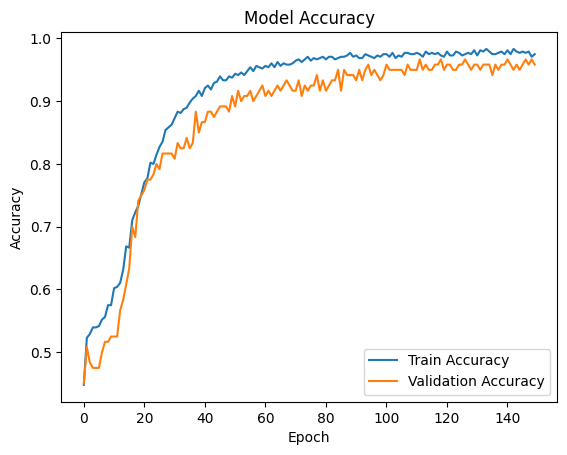

In [116]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


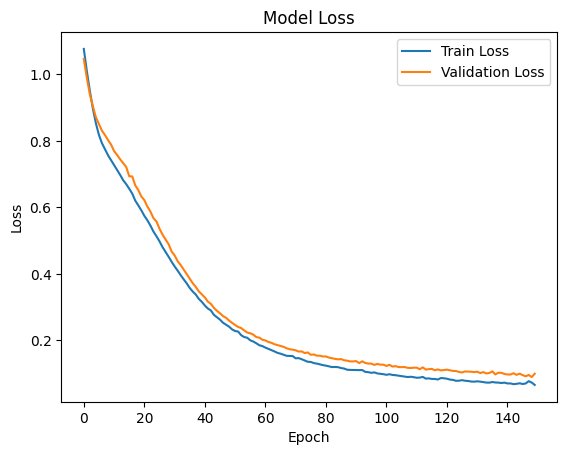

In [117]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [101]:
predictions=model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [118]:
print("Predicted Value:",predictions[90])
np.argmax(predictions[90])

Predicted Value: [2.7729320e-05 9.9992740e-01 4.4830667e-05]


1

In [111]:
print("Actual Value:",y_test[90])

Actual Value: 1


1726/1726 ━━━━━━━━━━━━━━━━━━━━ 2s 879us/step


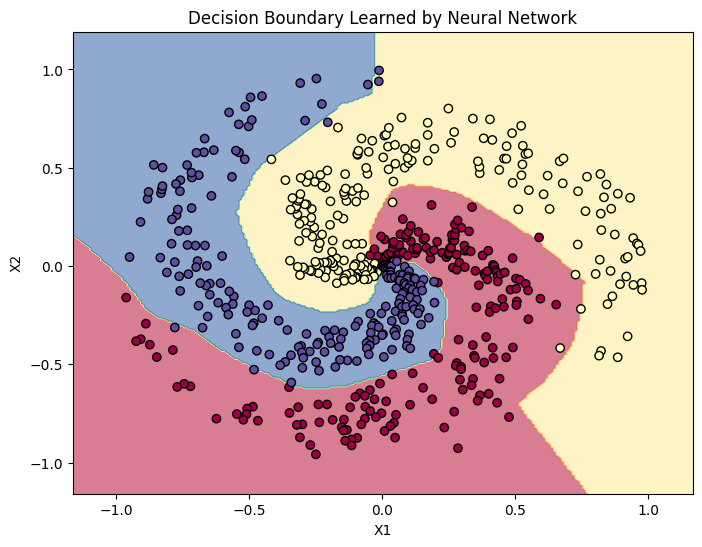

In [95]:
import numpy as np
import matplotlib.pyplot as plt

# Create a meshgrid of points to classify
h = 0.01  # step size in the mesh
x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid_scaled = np.c_[xx.ravel(), yy.ravel()]

# Don't forget to scale the grid using the same scaler


# Predict class probabilities
Z = model.predict(grid_scaled)
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap="Spectral", alpha=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="Spectral", edgecolors='k')
plt.title("Decision Boundary Learned by Neural Network")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()
